In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
seed = 0

## Rejection Sampling

In [3]:
from kerasy.ML.sampling import BaseSampler, RejectionSampler

In [4]:
X = np.linspace(-1, 1, 100)
N_samples = 10000

In [5]:
# Objective Probability Function.
p = lambda x: 1.0-abs(x)

#### Proposal Distribution $q$

In [6]:
beta_args = {
    "a": 2,
    "b": 2,
    "loc": -1,
    "scale": 2,
}

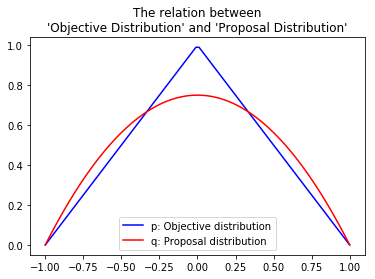

ValueError: `q`(z) >= p(z) must hold in all domains.

In [7]:
sampler = RejectionSampler(p, q="beta", domain=X, k=1, **beta_args)

In [8]:
sampler = RejectionSampler(p, q="beta", domain=X, k=2, **beta_args) 

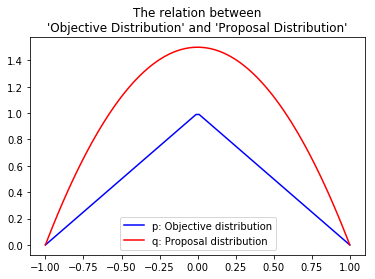

In [9]:
sampler.plot()
plt.show()

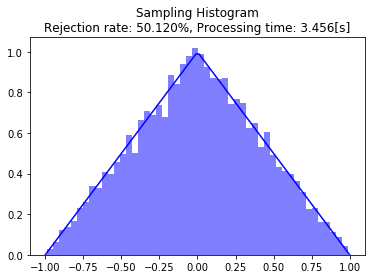

In [10]:
sampler.hist(N_samples, random_state=seed, verbose=-1)
plt.show()

## Metropolis-Hastings

In [11]:
from kerasy.ML.sampling import MHSampler

In [12]:
x = y = np.linspace(-3,3,100)

In [13]:
mu = np.array([0,0])
S  = np.array([[1, 0.5],[0.5, 1]])
p = stats.multivariate_normal(mu, S).pdf # Objective Distribution.
q = "multivariate_normal" # Proposal Distribution.

In [14]:
multivariate_normal_args = {
    "mean": np.array([0,0]),
    "cov": np.array([[1,0],[0,1]]),
}

In [15]:
sampler = MHSampler(p,q,**multivariate_normal_args)

MHSampler 0158/1100 [##------------------]  14.36% - 0.203s  

MHSampler 0299/1100 [#####---------------]  27.18% - 0.408s  

MHSampler 1100/1100 [####################] 100.00% - 1.957s  Plotting...


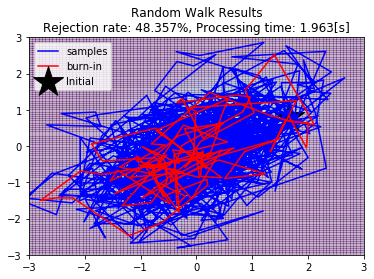

In [16]:
ax = sampler.plot(1000, x, y, burnin=100, random_state=seed)
ax.set_xlim(-3,3), ax.set_ylim(-3,3)
plt.show()

MHSampler 0157/1100 [##------------------]  14.27% - 0.203s  

MHSampler 0296/1100 [#####---------------]  26.91% - 0.406s  

MHSampler 0431/1100 [#######-------------]  39.18% - 0.611s  

MHSampler 1100/1100 [####################] 100.00% - 2.080s  Plotting...


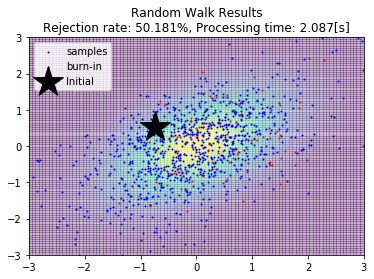

In [17]:
ax = sampler.scatter(1000, x, y, burnin=100, random_state=seed+1)
ax.set_xlim(-3,3), ax.set_ylim(-3,3)
plt.show()

## Gibbs Sampling

In [18]:
from kerasy.utils import measure_complexity
from kerasy.ML.sampling import GibbsMsphereSampler
from kerasy.utils import flush_progress_plot

In [19]:
N_samples = 1e4

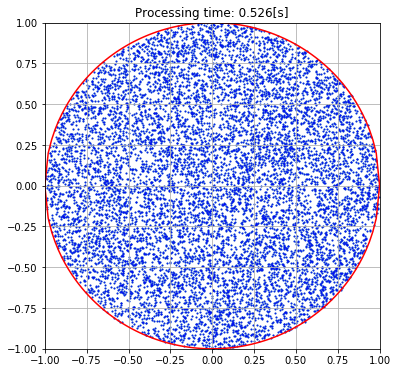

In [20]:
GibbsMsphereSampler.plot2D(N_samples)
plt.show()

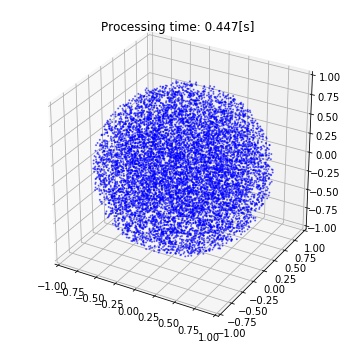

In [21]:
GibbsMsphereSampler.plot3D(N_samples)
plt.show()

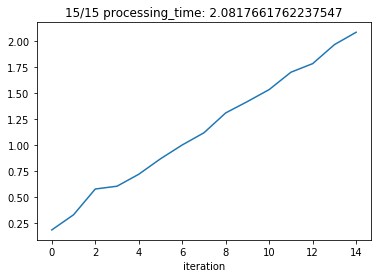

In [22]:
GibbsMsphereSampler.plot_p_times(N_samples, 15, repetitions=5)

Linear :)